In [19]:
# Importo las librerias
import pandas as pd
import numpy as np
from sqlalchemy.engine import URL
from sqlalchemy import create_engine
from seaborn import boxplot
import matplotlib.pyplot as plt
import seaborn as sns

# Info de la base de datos
server = '.\SQLEXPRESS'
database = 'heart2020'

In [20]:
# Info de la conexion
connection_string = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';Trusted_Connection=yes;'

connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": connection_string})

engine = create_engine(connection_url)

cnx = engine.connect()

In [21]:
# Hago un query para obtener los datos y lo guardo en un dataframe
df = pd.read_sql("SELECT * FROM heart2020.dbo.heart_2020", engine)

In [49]:
# Tiro magia a las columnas para que sean floats
df['BMI'] = df['BMI'].astype(float, errors= 'raise')
df['PhysicalHealth'] = df['PhysicalHealth'].astype(float, errors= 'raise')
df['MentalHealth'] = df['MentalHealth'].astype(float, errors= 'raise')
df['SleepTime'] = df['SleepTime'].astype(float, errors= 'raise')
df['AgeCategory'] = df['AgeCategory'].astype(str, errors= 'raise')

In [50]:
# Revisamos el dataframe
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,28.90,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,7.0,No,No,No
1,Yes,29.16,Yes,No,Yes,0.0,0.0,No,Male,70-74,White,Yes,Yes,Fair,8.0,No,No,No
2,No,23.57,Yes,No,No,0.0,2.0,No,Male,70-74,White,No,Yes,Very good,8.0,No,No,Yes
3,No,29.23,Yes,Yes,No,0.0,3.0,No,Female,40-44,White,No,No,Good,9.0,No,No,No
4,No,27.37,No,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Excellent,6.0,No,No,No


In [52]:
# Revisamos las dimensiones del dataframe
df.shape

(319795, 18)

In [51]:
# Revisamos los tipos de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [26]:
# Revisamos los tipos de datos de cada columna
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [27]:
# Revisamos las principales caracteristicas estadisticas del dataframe y los damos vuelta
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [80]:
# Veamos los datos estadisticas de SleepTime
df.SkinCancer.describe()

count     319795
unique         2
top           No
freq      289976
Name: SkinCancer, dtype: object

In [79]:
df.SkinCancer.value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

In [29]:
# Veamos los datos estadisticas de BMI
df.BMI.describe().T

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

Text(0.5, 1.0, 'SkinCancer vs BMI')

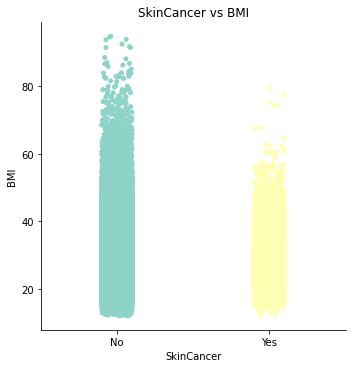

In [83]:
sns.catplot(x='SkinCancer', y = 'BMI', data=df, palette='Set3')
plt.title('SkinCancer vs BMI')
# No encuentro una relación directa entre el indice de masa corporal y el cancer de la piel

<AxesSubplot:xlabel='BMI', ylabel='SkinCancer'>

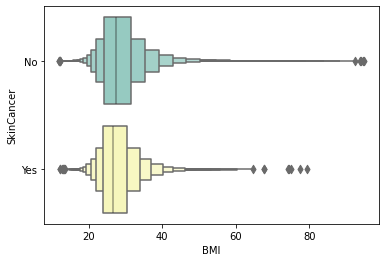

In [88]:
sns.boxenplot(x='BMI', y = 'SkinCancer', data=df, palette='Set3')
# No encuentro una relación directa entre el indice de masa corporal y el cancer de la piel

<AxesSubplot:xlabel='BMI', ylabel='SkinCancer'>

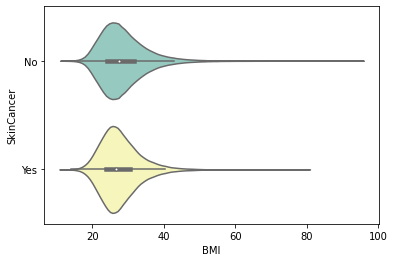

In [91]:
sns.violinplot(x='BMI', y = 'SkinCancer', data=df, palette='Set3')
# No encuentro una relación directa entre el indice de masa corporal y el cancer de la piel

In [ ]:
# No encuentro una relación directa entre el indice de masa corporal y el cancer de la piel